## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset
We are going to use the Haberman's survival dataset. This dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

The first step is importing the dataset into a variable in the code. Let's name our data `cancer_sur` importing the date using pandas function pd.read_csv()

In [2]:
cancer_sur = pd.read_csv("https://raw.githubusercontent.com/InovaDx/public/master/Multivariate_analysis/haberman.csv")

You can see the top 5 rows by using `cancer_sur.head()`

In [3]:
cancer_sur.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


The top 5 rows are displayed, but it is difficult to make sense of the data, because columns have no labels. Let's add column labels:

In [4]:
cancer_sur = pd.read_csv("https://raw.githubusercontent.com/InovaDx/public/master/Multivariate_analysis/haberman.csv", header=None, names=['age', 'operation_year', 'axil_nodes_det', 'surv_status'])

The code above includes the following options to import csv files:

`header = None` removes its headers

`names =[]` sets the column names matching the arguments in the list (“Age”, “Operation_year, “axil_nodes_det”, “Surv_status”).

## Some Basic analysis:
lets see top 5 rows after updating labels using Cancer_sur.head().

The number of rows to display can be specified as a parameter. Let's display 7 rows:

In [5]:
cancer_sur.head(7)

,age,operation_year,axil_nodes_det,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1


`cancer_sur.tail()` displays the last 5 rows

In [6]:
cancer_sur.tail()

,age,operation_year,axil_nodes_det,surv_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


## High level statistics:
Some of the quick statistics from the dataset are:

* Count(gives total rows)
* Mean(average)
* Standard deviation
* Min, max
* Total number of features (columns) and data types using .describe() and .info().

In [7]:
cancer_sur.describe()

,age,operation_year,axil_nodes_det,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
cancer_sur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age               306 non-null int64
operation_year    306 non-null int64
axil_nodes_det    306 non-null int64
surv_status       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


## Observations
Our dataset has 306 rows (=datapoints) with 4 columns (=features)

Minimum age is 30, maximum is 83, with an average of 52, and standard deviation ($\sigma$) of 10. The $25^{th}$ percentile or quartile 1 (Q1) is 44, $75^{th}$ percentile or quartile 3 (Q3) is 60.75. That makes the interquartile range (IQR) 16.75, and values outside the range [27.25, 77.5] ([Q1-1.5\*IQR, Q3+1.5\*IQR]) outliers

Surv_status is a target column with two possible values

1 = survived

2 = not survived

Lets see how target values are distributed in the dataset using `.value_counts()`

In [9]:
cancer_sur['surv_status'].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

# Univariate analysis

## PDF, CDF, Boxplot, Voilin plots,Distribution plots
Analysis done based only on one variable. Let's create some graphs to help understand some basic concepts

### Distribution plot:
Distribution plot displays the density of distributions

We use the `seaborn` library to plot the graph

C:\ProgramData\Anaconda3\envs\ds36\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  **kwargs)


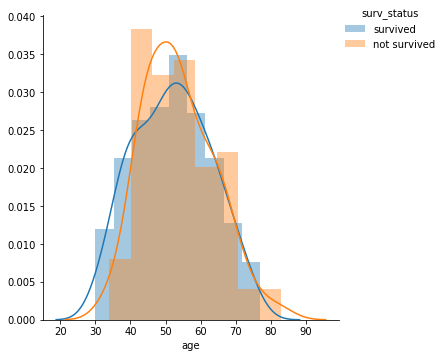

In [10]:
sns.FacetGrid(cancer_sur, hue="surv_status", height=5).map(sns.distplot, 'age').add_legend(labels=['survived','not survived'])

C:\ProgramData\Anaconda3\envs\ds36\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  **kwargs)


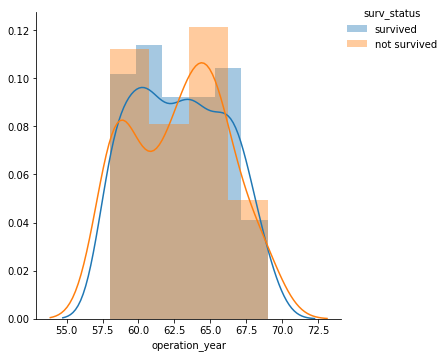

In [11]:
sns.FacetGrid(cancer_sur, hue="surv_status", height=5).map(sns.distplot, "operation_year").add_legend(labels=['survived','not survived'])

The plot above shows that people who had surgery between 1958 and 1966 had more chances of surviving

### CDF (cummulative distributive function) and PDF (probability denstiy funtion)

pdf= [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
bin edges= [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
cdf= [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


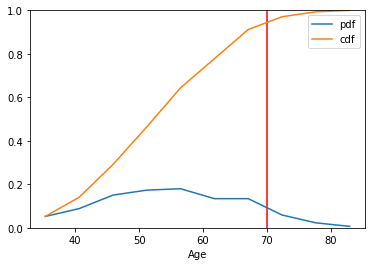

In [12]:
counts, bin_edges = np.histogram(cancer_sur['age'], bins=10, density=True)

plt.xlabel('Age')
pdf = counts/sum(counts)
print(f"pdf= {pdf}")
print(f"bin edges= {bin_edges}")
cdf = np.cumsum(pdf)
print(f"cdf= {cdf}")
plt.plot(bin_edges[1:], pdf, label="pdf")
plt.plot(bin_edges[1:], cdf, label="cdf")
plt.ylim(0.0, 1.0)
plt.vlines(70, plt.ylim()[0], plt.ylim()[1], colors='r')
plt.legend()

This plot is using just variable “age”, and show the cummulative distribution function and probability density function.
The vertical line at Age 70, intersects the cummulative distribution function curve at approximately 0.95, meaning 95% of the population are younger than 70 years. That same line intersects the probability density function at approximately 0.08, meaning only 8% of the population are 70 years of age.

## Bivariate analysis
Studies the relationship between two variables

### Box plot
Box plot is a nice way of displaying some statistics along with the relationship between two values

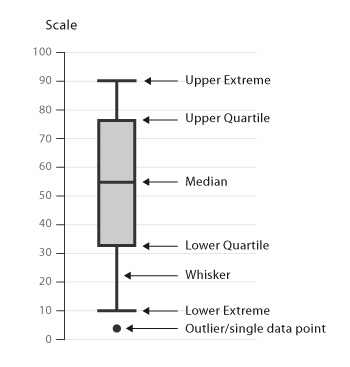

In [13]:
cancer_sur

,age,operation_year,axil_nodes_det,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


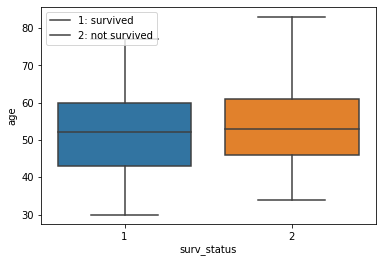

In [14]:
ax = sns.boxplot(x='surv_status', y='age', data=cancer_sur)
handles, _ = ax.get_legend_handles_labels()
ax.legend(['1: survived', '2: not survived'], loc='upper left')

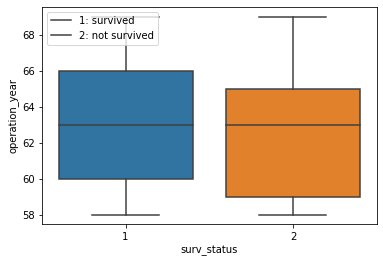

In [15]:
ax = sns.boxplot(x='surv_status', y='operation_year', data=cancer_sur)
handles, _ = ax.get_legend_handles_labels()
ax.legend(['1: survived', '2: not survived'], loc='upper left')

## Violin plots

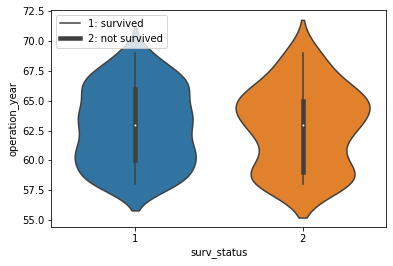

In [16]:
ax = sns.violinplot(x='surv_status', y='operation_year', data=cancer_sur, size=8)
handles, _ = ax.get_legend_handles_labels()
ax.legend(['1: survived', '2: not survived'], loc='upper left')

## Multivariate Analysis

### Pair plot
Pair plot shows a clear and nice view of all variables and their realtionships

The `vars` option is removing column `'surv_status'` (the last column) from the list of variables to plot. Seaborn tries to use all numeric columns in the grid plots. Since the target `'surv_status'` is numeric, we need to remove it so that there are no error when plotting the grid plots.

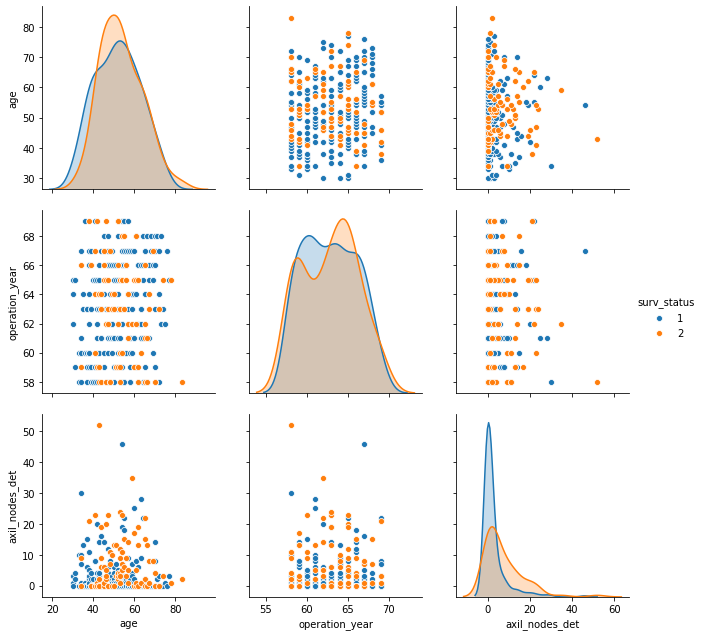

In [17]:
sns.pairplot(cancer_sur, vars=cancer_sur.columns[:-1], hue='surv_status', height=3)